1. Реализовать алгоритмы одномерной оптимизации из лекции (половинного деления, золотого сечения, Ньютона)
2. Выбрать произвольно несколько унимодальных функций одной переменной. Изобразить их на графике.
3. Исследовать выбранные функции любым методом 0-порядка, методом Ньютона. Сделать вывод об эффективности методов.

In [8]:
# Метод золотого сечения
def golden_section(f, a, b, tol=1e-5):
    phi = (1 + 5 ** 0.5) / 2
    c = b - (b - a) / phi
    d = a + (b - a) / phi
    while abs(c - d) > tol:
        if f(c) < f(d):
            b = d
        else:
            a = c
        c = b - (b - a) / phi
        d = a + (b - a) / phi
    return (a + b) / 2

# Определяем функцию
def f(x):
    return x ** 2 - 4 * x + 4

min_x = golden_section(f, 0, 5)

print(f'Минимум функции: {min_x}')

Минимум функции: 2.0000089412914797


In [7]:
# Метод половинного деления
def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) > 0:
        raise ValueError("Функция должна иметь разные знаки на концах интервала")

    iter_count = 0
    while (b - a) / 2 > tol and iter_count < max_iter:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
        iter_count += 1

    return (a + b) / 2

def f(x):
    return x ** 2 - 4 * x + 4

root = bisection_method(f, 1, 2)
print(f'Корень уравнения: {root}')

Корень уравнения: 1.9999990463256836


In [6]:
# Ньютоновский метод
def f(x):
    return x ** 2 - 4 * x + 4

def df(x):
    return 2*x - 4

def newton_method(f, df, x0, epsilon=1e-6, max_iter=100):
    iter_count = 0
    while iter_count < max_iter:
        x1 = x0 - f(x0) / df(x0)
        if abs(x1 - x0) < epsilon:
            break
        x0 = x1
        iter_count += 1
    return x1, iter_count

x0 = 3
root, iterations = newton_method(f, df, x0)

print(f'Корень уравнения: {root}\n'
      f'Число итераций: {iterations}')

Корень уравнения: 2.0000009536743164
Число итераций: 19


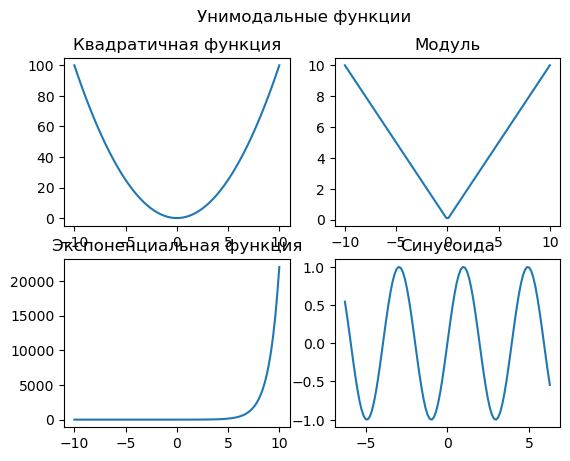

In [5]:
import matplotlib.pyplot as plt
import numpy as np
#2
fig, axs = plt.subplots(2, 2)
fig.suptitle('Унимодальные функции')

x = np.linspace(-10, 10, 100)
y = x ** 2

axs[0, 0].plot(x, y)
axs[0, 0].set_title('Квадратичная функция')

y_1 = np.abs(x)
axs[0, 1].plot(x, y_1)
axs[0, 1].set_title('Модуль')

y_2 = np.exp(x)
axs[1, 0].plot(x, y_2)
axs[1, 0].set_title('Экспоненциальная функция')

x_3 = np.linspace(-2*np.pi, 2*np.pi, 100)
y_3 = np.sin(x)
axs[1, 1].plot(x_3, y_3)
axs[1, 1].set_title('Синусоида')

plt.show()

In [9]:
#3
import time
import numpy as np

def newton_method(f, df, x0, epsilon=1e-6, max_iter=100):
    start = time.time()
    iter_count = 0
    while iter_count < max_iter:
        x1 = x0 - f(x0) / df(x0)
        if abs(x1 - x0) < epsilon:
            break
        x0 = x1
        iter_count += 1
    end = time.time()
    result_time = end - start
    return x1, iter_count, result_time

def golden_section(f, a, b, tol=1e-5):
    start = time.time()
    phi = (1 + 5 ** 0.5) / 2
    c = b - (b - a) / phi
    d = a + (b - a) / phi
    while abs(c - d) > tol:
        if f(c) < f(d):
            b = d
        else:
            a = c
        c = b - (b - a) / phi
        d = a + (b - a) / phi
    end = time.time()
    result_time = end - start
    return ((a + b) / 2), result_time

# Определяем функцию
def f(x):
    return x ** 2 - 4 * x + 4

def df(x):
    return 2*x - 4

min_x, result_time = golden_section(f, 0, 5)
print(f'Решение методом золотого сечения: {min_x} (выполнено за время - {result_time * 10**3} мс)\n')

x0 = 3
root, iterations, result_time = newton_method(f, df, x0)
print(f'Решение методом Ньютона: {root} (выполнено за время - {result_time * 10**3} мс)')

Решение методом золотого сечения: 2.0000089412914797 (выполнено за время - 0.0 мс)

Решение методом Ньютона: 2.0000009536743164 (выполнено за время - 0.0 мс)
